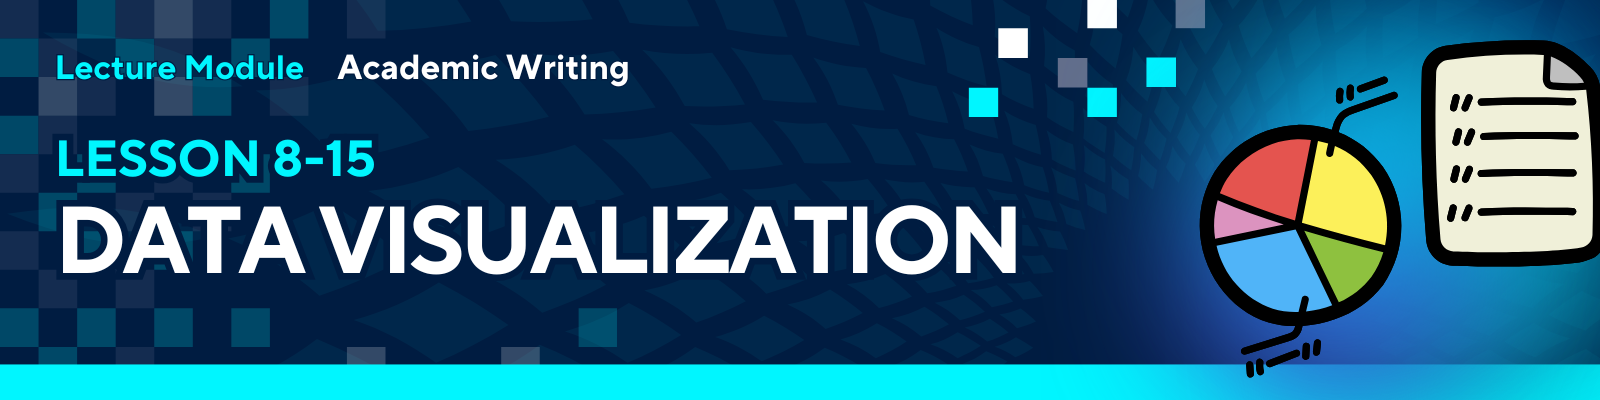

# **📑 Data Visualization Assignment Instructions**

In this assignment, you'll create insightful visualizations from one of four interesting datasets (your choice!).

1. **Pick Your Dataset**: Look through the four sections below and choose **ONE dataset** that interests you the most. You only need to complete the work for that one section. (Once you decided, please delete the other sections so the instructor can check your work easier.)

2. **Create Your Visualizations**: For each visualization you make, you'll need to include these four parts:

  - **The Question**: Write down what you want to discover or show with your visualization

  - **Data Handling** (optional): Use the provided code cell to organize your data if needed. This part is not graded.

  - **The Visualization**: Create your plot using the provided code cell with Python, or upload your own if you made it with different software

  - **The Analysis**: Explain what insights you found from your visualization and what it tells us (min 25 words)


**⚠️ Important Rules to Remember:**

1. Each visualization **must show at least 3 features/dimensions of data**. You can do this in different ways:

  - Making multiple panels that each show 2 dimensions or more
  - Adding extra information through colors, sizes, or annotations
  - Any other creative way (except 3D plots - these are not allowed!)


2. You **can't use the same type of plot more than twice** (for example, you can make up to 2 bar plots, but not 3)


**📝 How You'll Be Graded:**

1. The quality of your research questions (bonus points if the 5 questions are all related)
2. Whether your plots are accurate and show the data correctly (the code for data handling and visualization itself will not be graded)
3. How nice and clear your visualizations look
4. How well you analyze and explain what your visualizations show

---
---

# **Dataset 4: Pokémon Information**
<img src="https://i.imgur.com/2ZgTzF0.png" width=1024 />

## **Context**
This Dataset contains data from all Pokemons and their forms from the eight generations. It includes their number, name, primary and secondary type, abilities, base stats, performance vs other types, etc. Data was scrapped from https://pokemondb.net/ (mostly everything) and https://www.serebii.net/ (information about sub-legendary, legendary and mythical pokemon).

## **Content**


**Pokédex Data:**

pokedex_number: The entry number of the Pokemon in the National Pokedex

name: The English name of the Pokemon

german_name: The German name of the Pokemon

japanese_name: The Original Japanese name of the Pokemon

generation: The numbered generation which the Pokemon was first introduced

status: Denotes if the Pokemon is normal, sub-legendary, legendary, or mythical

species: The Category of the Pokemon

type_number: Number of types that the Pokemon has

type_1: The Primary Type of the Pokemon

type_2: The Secondary Type of the Pokemon if it has it

height_m: Height of the Pokemon in meters

weight_kg: The Weight of the Pokemon in kilograms

abilities_number: The number of abilities of the Pokemon

ability_?: Name of the Pokemon abilities

ability_hidden: Name of the hidden ability of the Pokemon if it has one

**Base stats:**

total_points: Total number of Base Points

hp: The Base HP of the Pokemon

attack: The Base Attack of the Pokemon

defense: The Base Defense of the Pokemon

sp_attack: The Base Special Attack of the Pokemon

sp_defense: The Base Special Defense of the Pokemon

speed: The Base Speed of the Pokemon

**Training:**

catch_rate: Catch Rate of the Pokemon

base_friendship: The Base Friendship of the Pokemon

base_experience: The Base experience of a wild Pokemon when caught

growth_rate: The Growth Rate of the Pokemon

**Breeding:**

egg_type_number: Number of groups where a Pokemon can hatch

egg_type_?: Names of the egg groups where a Pokemon can hatch

percentage_male: The percentage of the species that are male. Blank if the Pokemon is genderless.

egg_cycles: The number of cycles (255-257 steps) required to hatch an egg of the Pokemon

**Type defenses:**

against_?: Eighteen features that denote the amount of damage taken against an attack of a particular type

---

*Dataset Source: https://www.kaggle.com/datasets/mariotormo/complete-pokemon-dataset-updated-090420*

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as pltc
from urllib.request import urlretrieve
plt.rcParams['figure.dpi'] = 300

def load_dataset(url, filename): return pd.read_csv(filename) if os.path.exists(filename) else pd.read_csv(url, index_col=0).to_csv(filename, index=False) or pd.read_csv(filename, index_col=0)

pokemon_dataset = load_dataset("https://www.dropbox.com/scl/fi/e2sncoofjip2aytzzehuf/pokedex_-Update_04.21.csv?rlkey=cr8pikuyny2kn0xohivo6mc2i&st=qwae3ow5&dl=0&raw=1", "pokemon_dataset.csv")
pokemon_dataset

,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,NaN,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,896,Glastrier,Polaross,ブリザポス (Burizaposu),8,Sub Legendary,Wild Horse Pokémon,1,Ice,NaN,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1041,897,Spectrier,Phantoross,レイスポス (Reisuposu),8,Sub Legendary,Swift Horse Pokémon,1,Ghost,NaN,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1042,898,Calyrex,Coronospa,バドレックス (Budrex),8,Legendary,King Pokémon,2,Psychic,Grass,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1043,898,Calyrex Ice Rider,Coronospa,バドレックス (Budrex),8,Legendary,High King Pokémon,2,Psychic,Ice,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0


## **Visualization 1**

Question 1: how does the choice of the name translation (change name or keep Japanese name) evolve through generations?

In [2]:
# Removing duplicate names due to alternate forms and variants
pokedex = pokemon_dataset.groupby("pokedex_number").first()

# Levenstein distance to check how similar names are
cache = {}
def levenstein(name1, name2):
	name1, name2 = min(name1, name2), max(name1, name2)
	if (name1, name2) in cache: return cache[(name1, name2)]
	if len(name1) == 0: result = len(name2)
	elif len(name2) == 0: result = len(name1)
	elif name1[0] == name2[0]: result = levenstein(name1[1:], name2[1:])
	else: result = 1 + min(levenstein(name1, name2[1:]), levenstein(name1[1:], name2), levenstein(name1[1:], name2[1:]))
	cache[(name1, name2)] = result
	return result

# Keeping only name, german name, japanese name (romaji) and generation
name_data = pokedex[["name", "german_name", "japanese_name", "generation"]]
name_data.loc[:, "japanese_name"] = name_data["japanese_name"].str.extract(r"\((.+)\)")[0]

# Computing the levenstein distance between english or german and japanese names
dist_data = name_data[["generation"]].copy()
dist_data.loc[:, "jp_en_dist"] = name_data.apply(lambda row: levenstein(row["name"], row["japanese_name"]), axis=1)
dist_data.loc[:, "jp_gr_dist"] = name_data.apply(lambda row: levenstein(row["german_name"], row["japanese_name"]), axis=1)

# Grouping every distance above MAX together
MAX = 5
dist_data.loc[dist_data["jp_en_dist"] >= MAX, "jp_en_dist"] = MAX
dist_data.loc[dist_data["jp_gr_dist"] >= MAX, "jp_gr_dist"] = MAX

# Counting the number of instances of each distance
dist_data = dist_data.reset_index()
similar_en = dist_data.groupby(["generation", "jp_en_dist"])\
					.count()[["pokedex_number"]]\
					.unstack("jp_en_dist")\
					.fillna(0)\
					.rename(columns={"pokedex_number": "count"})
similar_gr = dist_data.groupby(["generation", "jp_gr_dist"])\
					.count()[["pokedex_number"]]\
					.unstack("jp_gr_dist")\
					.fillna(0)\
					.rename(columns={"pokedex_number": "count"})

# Changing count into percent
cols = [("count", i) for i in range(MAX+1)]
similar_en[cols] = similar_en[cols].div(similar_en[cols].sum(axis=1), axis=0).multiply(100)
similar_gr[cols] = similar_gr[cols].div(similar_gr[cols].sum(axis=1), axis=0).multiply(100)

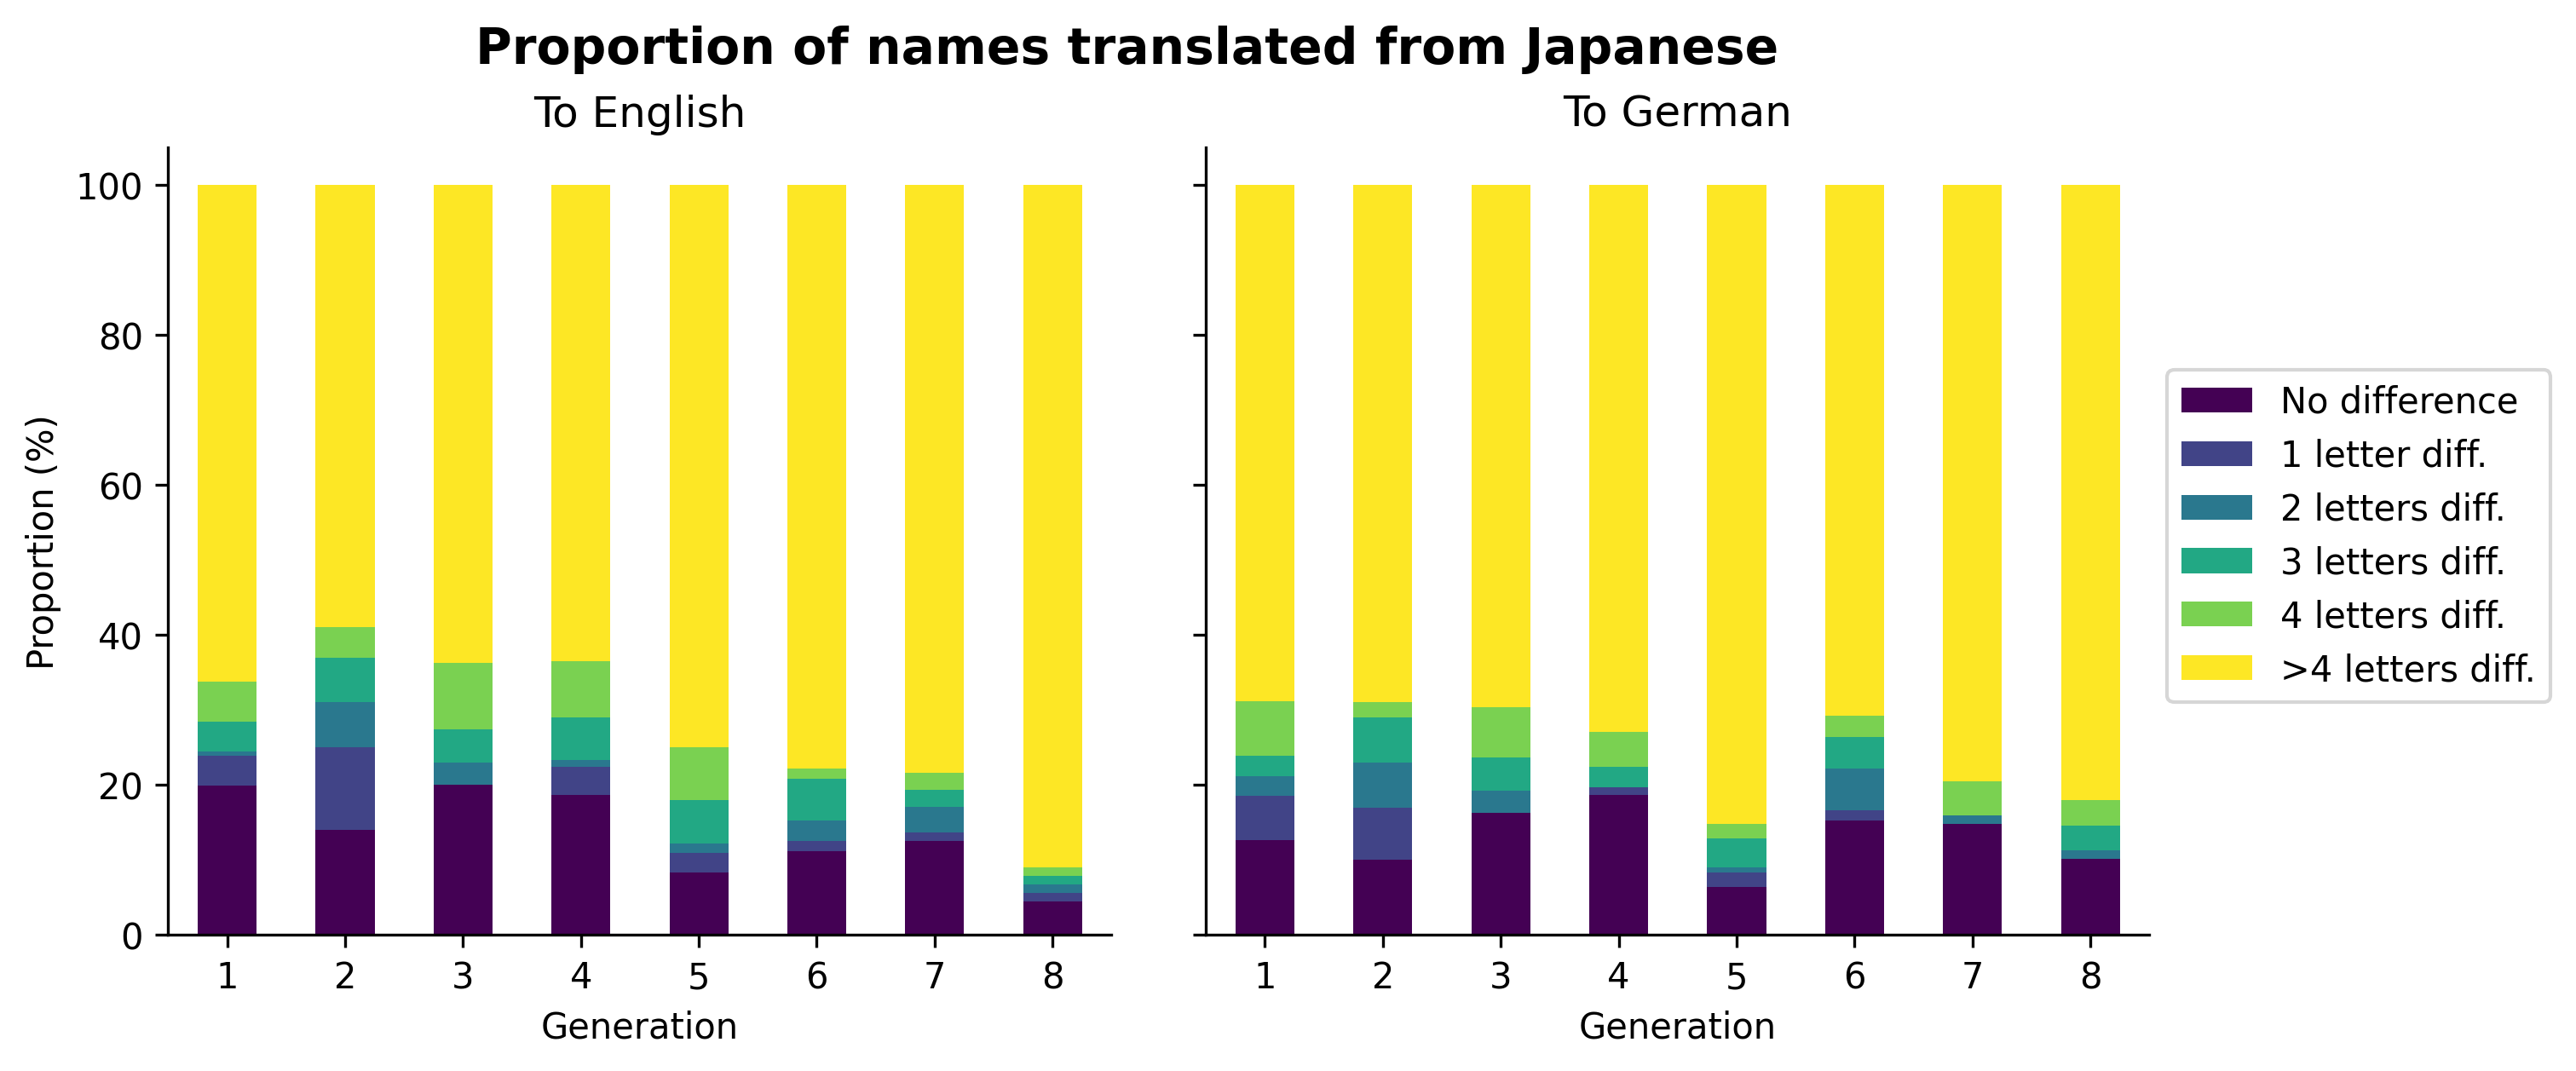

In [3]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
fig.subplots_adjust(wspace=0.1)

similar_en.plot(
	ax=ax1, kind="bar", stacked=True,
	sharey=True,
	colormap="viridis",
	title="To English",
	ylabel="Proportion (%)",
	xlabel="Generation",
	rot="horizontal",
	legend=False
)

similar_gr.plot(
	ax=ax2, kind="bar", stacked=True,
	sharey=True,
	colormap="viridis",
	title="To German",
	ylabel="Proportion (%)",
	xlabel="Generation",
	rot="horizontal",
	legend=False
)

fig.suptitle("Proportion of names translated from Japanese",
	fontsize=14, fontweight="bold", y=1)

handles, _ = ax2.get_legend_handles_labels()
fig.legend(handles,
		   ["No difference", "1 letter diff.", "2 letters diff.", "3 letters diff.", "4 letters diff.", ">4 letters diff."],
		   title="", bbox_to_anchor=(0.9, 0.5),
           loc='center left', ncol=1, fontsize=10
)

sns.despine()

plt.show()

We can see that for both English and German names, there's a slight tendency to keep less and less Japanese names over time.

The Levenstein distance was taken instead of an equality comparison to take into account very small changes, for example, Intereon(JP) was changed into Inteleon(EN) and Wooluu(JP) into Wooloo(EN) but they are similar enough to consider that the Japanese names were kept. However, this also includes names with similar distance but that might not be considered similar, like Gothimu(JP) changed to Gothita(EN).

## **Visualization 2**

Question 2: Is there a correlation between the total number of Base Point and the sum of Type Defenses? Does the Status play a role in this?

In [4]:
# Correcting some incorrect values (125 to .125)
pokemon_dataset["against_ice"] = pokemon_dataset["against_ice"].replace(125, .125)

# Computing the sum of Type Defenses
data_vis2 = pokemon_dataset[["pokedex_number", "name", "status", "total_points"]].copy()
data_vis2.loc[:, "defense"] = pokemon_dataset[list(pokemon_dataset.filter(regex=r"^against_"))].sum(axis=1)

# Removing outlier for cleaner plot
data_vis2 = data_vis2.drop(data_vis2[data_vis2["name"] == "Eternatus Eternamax"].index)

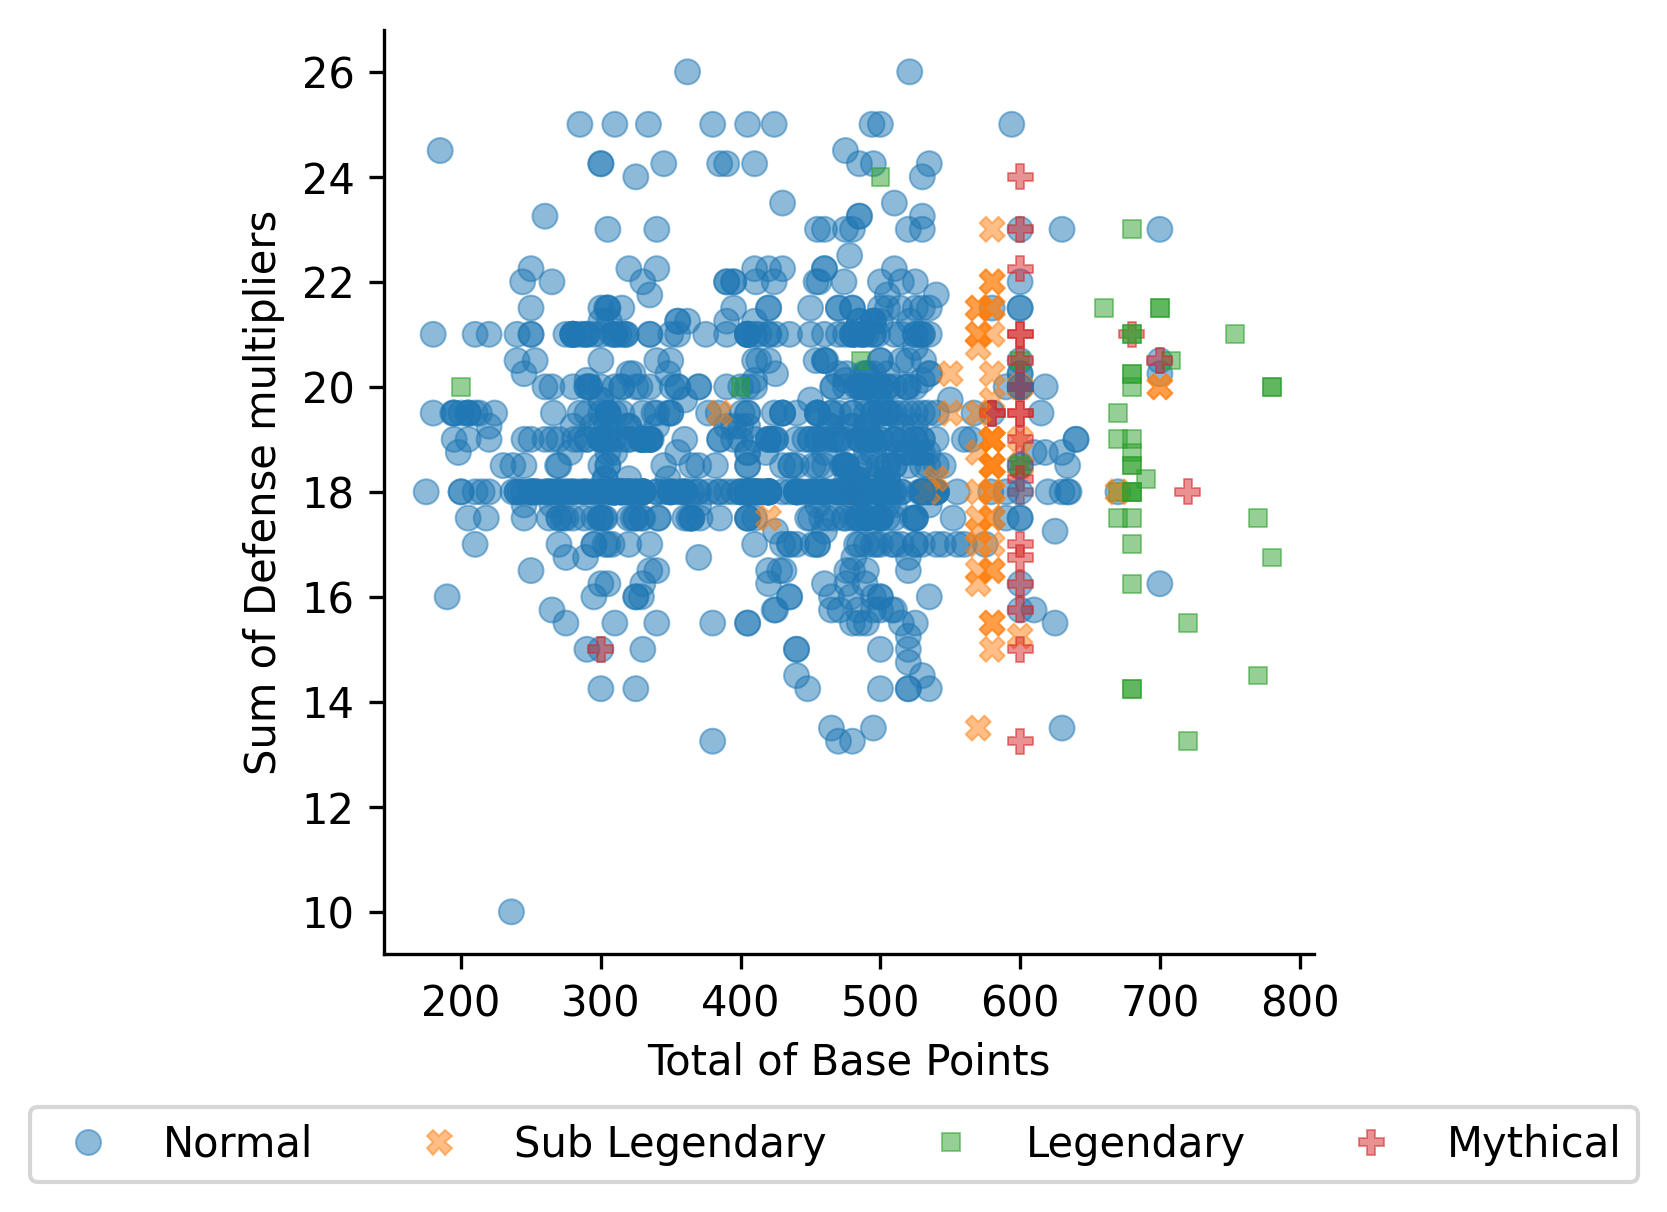

In [5]:
# Setup
fig, ax = plt.subplots(figsize=(4, 4))

sns.scatterplot(
	ax=ax, data = data_vis2,
	x="total_points", y="defense",
	hue="status", style="status",
	alpha=.5, edgecolor=None
)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels,
		   title="", bbox_to_anchor=(0.5, 0),
           loc='upper center', ncol=4, fontsize=10
)

ax.set(
      xlabel="Total of Base Points",
      ylabel="Sum of Defense multipliers")
ax.get_legend().remove()
sns.despine()

plt.show()

There is absolutely no correlatoin between the Total of Base Points and the Sum of Defense Multipliers, however we can see that most pokemons of Mythical status have exactly 600 Base Points, most pokemons of Legendary status are above this value and most pokemons of Sub Legendary status are just under this value.

There is also one outlier of Legendary status with 1125 Base Points that was removed for the plot to look nicer. Its name is "Eternatus Eternamax".

## **Visualization 3**

Question 3: Is there a correlation between the Weight and the Height of pokemons? Does the Status play a role in this?

In [54]:
# None

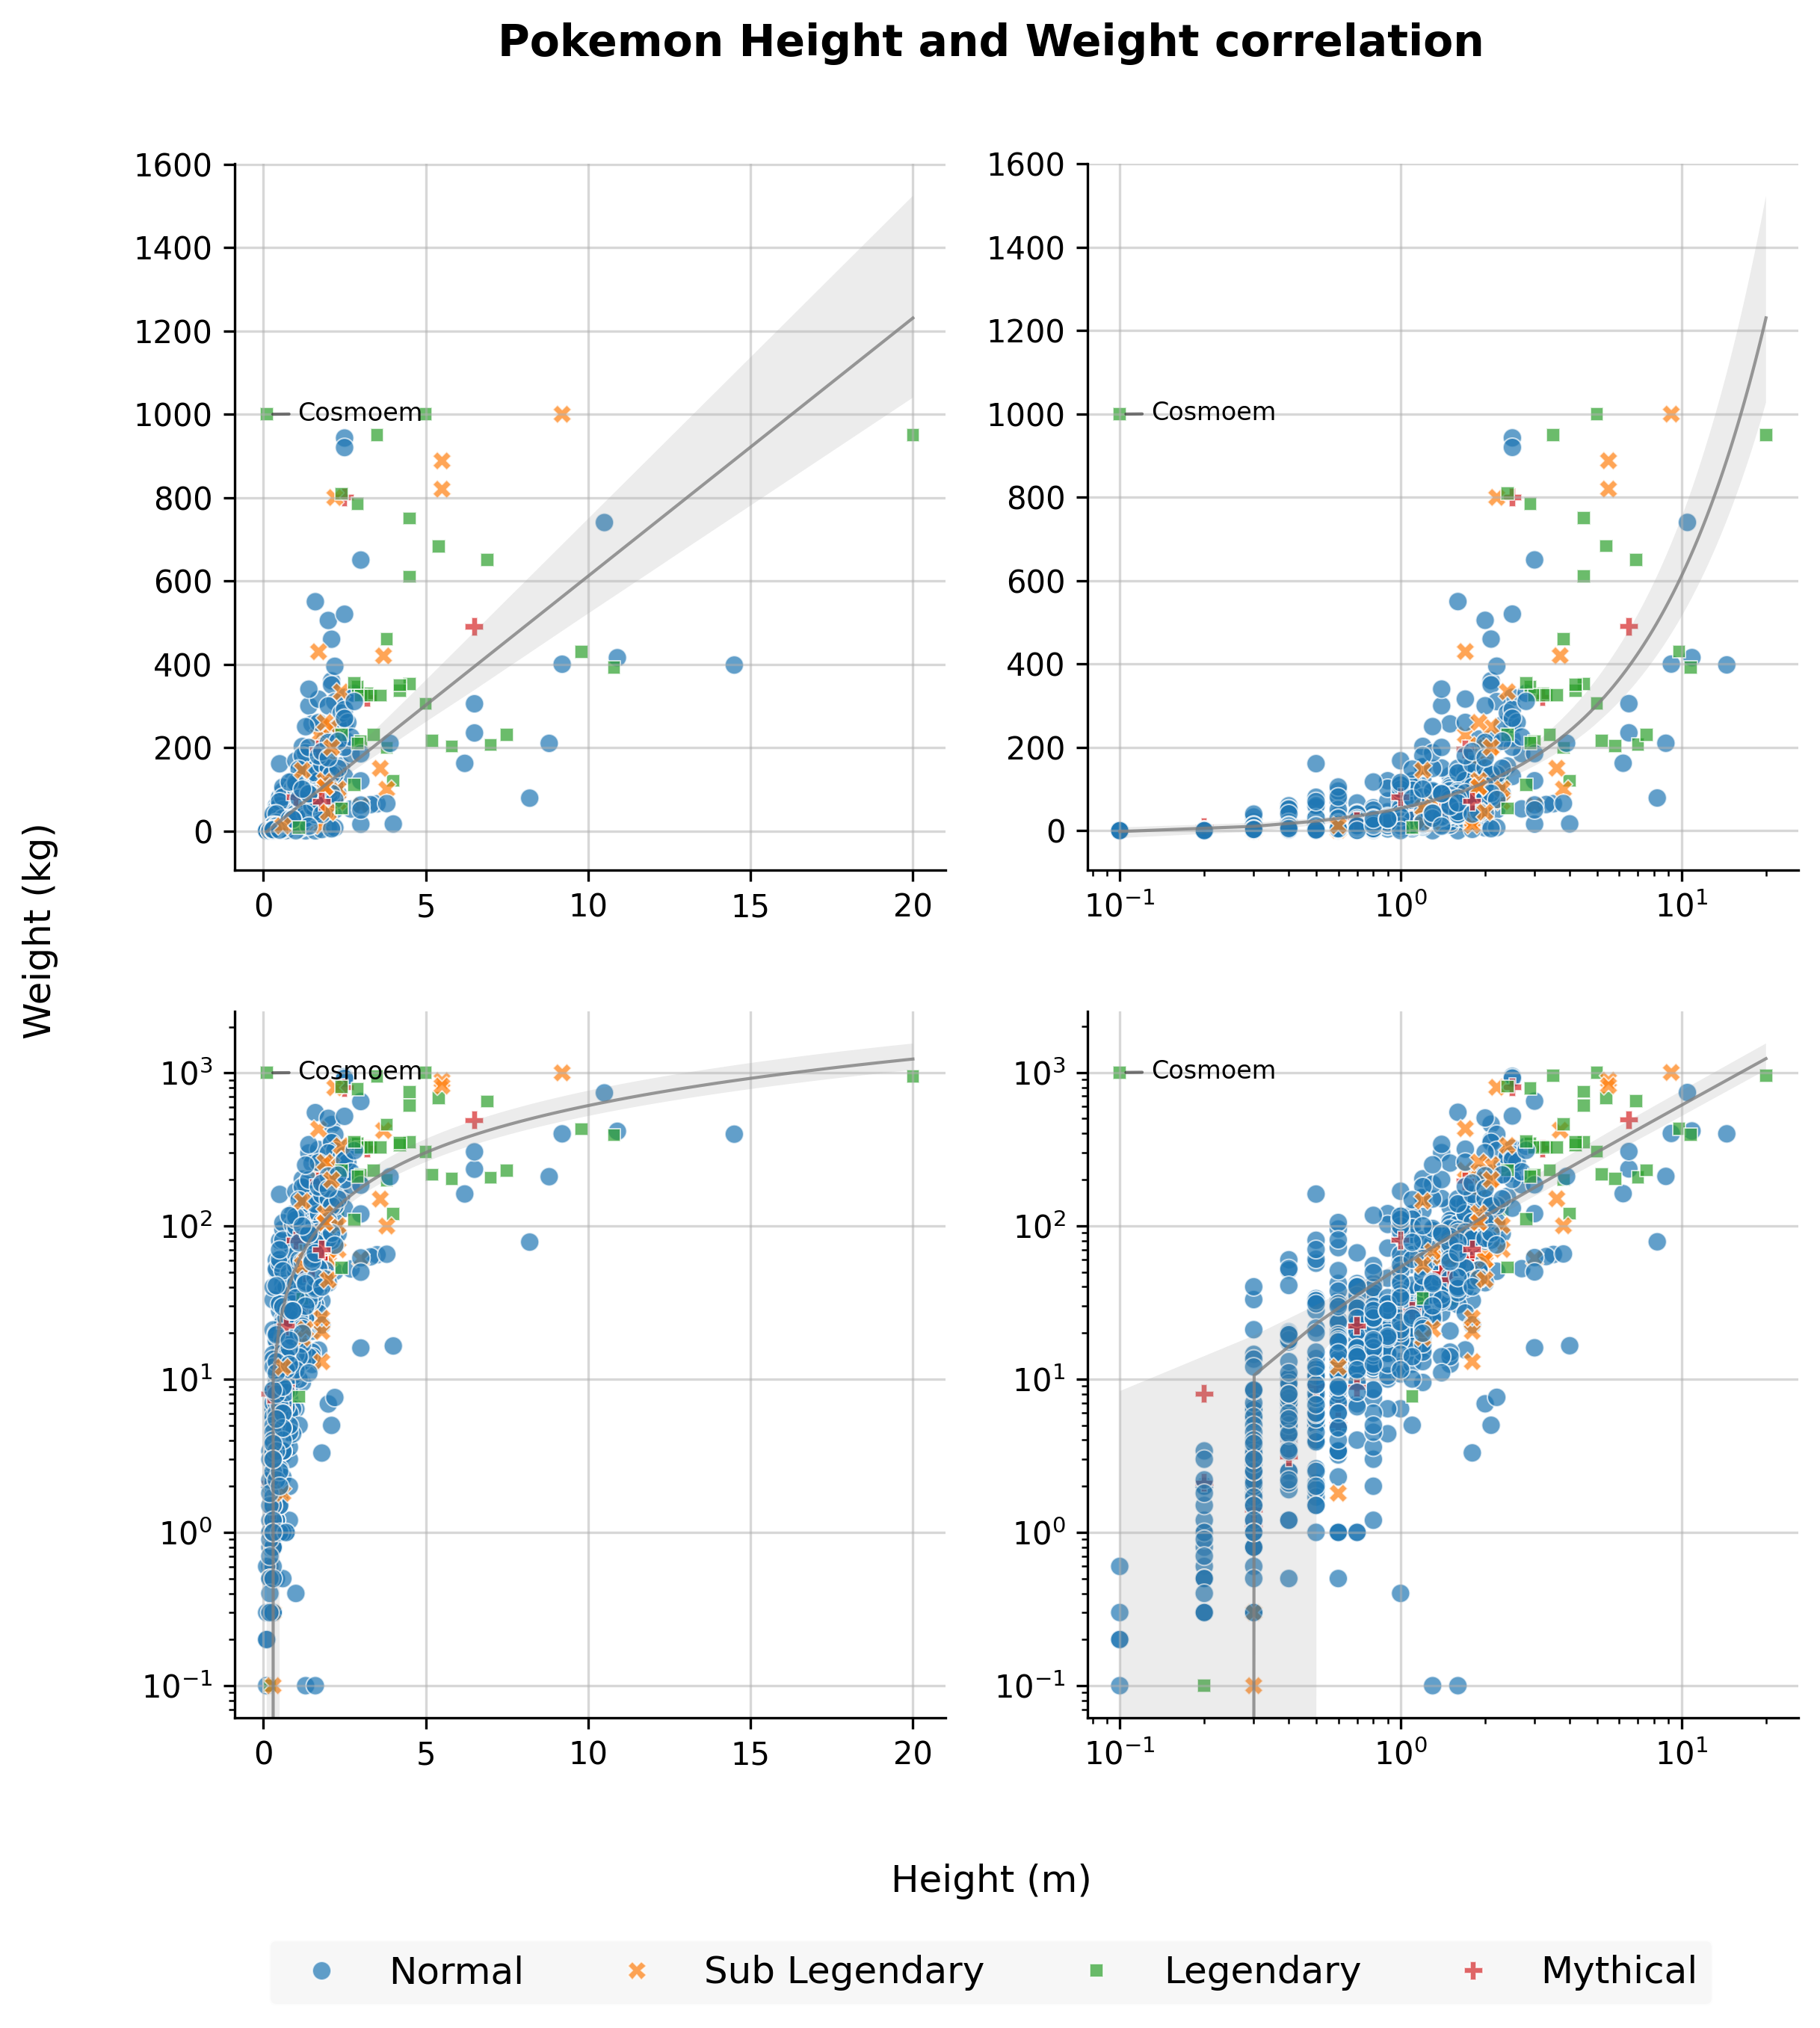

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(9, 9))
axes[0][1].set(xscale="log")
axes[1][0].set(yscale="log")
axes[1][1].set(xscale="log", yscale="log")

for ax in axes.flatten():

	sns.scatterplot(
		pokemon_dataset, ax=ax, x="height_m", y="weight_kg",
		hue="status", style="status",
		alpha=0.7,
	)
	sns.regplot(
		pokemon_dataset, ax=ax, x="height_m", y="weight_kg",
		scatter=False, color='grey', line_kws={'alpha': 0.8, 'linewidth': 1},
	)

	ax.set_xlabel("")
	ax.set_ylabel("")
	ax.grid(True, alpha=0.5, zorder=1)
	ax.spines[['top', 'right']].set_visible(False)
	ax.get_legend().remove()

	# Add Pokemon Names
	for pkmn in ["Cosmoem"]:
		pkmn_data = pokemon_dataset[pokemon_dataset["name"] == "Cosmoem"]
		ax.annotate(pkmn,
					xy=(pkmn_data['height_m'].iloc[0],
						pkmn_data['weight_kg'].iloc[0]),
					xytext=(10, -2), textcoords='offset points', fontsize=8,
					bbox=dict(boxstyle='round,pad=0.1', facecolor='none',
								edgecolor='none', alpha=0.7),
					arrowprops=dict(arrowstyle='-', alpha=0.5))

# Figure Labels
fig.supylabel("Weight (kg)", fontsize=12, y=0.5)
fig.supxlabel("Height (m)", fontsize=12, y=0.02)
fig.suptitle("Pokemon Height and Weight correlation",
             fontsize=14, fontweight='bold', y=0.95)

# Add common legend
handles, labels = axes[0][0].get_legend_handles_labels()
fig.legend(handles, labels, title="", fontsize=12, facecolor="whitesmoke", edgecolor="white",
          	bbox_to_anchor=(0.5, 0), loc='upper center', ncol=4, borderaxespad=0)

plt.show()

Analysis 3: It is hard to notice any strong correlation between height and weight on the first plot (linear axes), but we can see that there is a small correlation in the plots with logarithmic scales, at the exception of an outlier: Cosmoem, it is very small and extremely heavy because it is supposed to be a celestial body restrained in a small shell.

We can also notice that the bottom of the scales (both in height and weight) is mostly occupied by pokemons of "Normal" Status.

## **Visualization 4**

Question 4: (insert question)

In [ ]:
# Data Handling


In [ ]:
# Plot 4


Analysis 4: (insert analysis)

## **Visualization 5**

Question 5: (insert question)

In [ ]:
# Data Handling


In [ ]:
# Plot 5


Analysis 5: (insert analysis)

---
---